In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D

import numpy as np
from glob import glob

In [2]:
IMAGE_SIZE = [224, 224]

train_path = 'data'


In [3]:
folders = glob('data/*')
folders

['data\\test', 'data\\train']

In [4]:
Classifier=Sequential()

Classifier.add(Conv2D(32,(3,3), input_shape=(224,224,3), activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))

Classifier.add(Conv2D(32,(3,3),activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))

Classifier.add(Flatten())

Classifier.add(Dense(units = 128, activation = 'relu'))
Classifier.add(Dense(units = 3, activation = 'softmax'))


In [5]:
Classifier.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)
Classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 93312)             0         
                                                                 
 dense (Dense)               (None, 128)               1

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   height_shift_range=0.2,
                                   featurewise_center=True,
                                   rotation_range=0.4,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255,)

In [7]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('data/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 258 images belonging to 3 classes.


In [8]:
test_set = test_datagen.flow_from_directory('data/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical',shuffle=False)

Found 70 images belonging to 3 classes.


In [9]:
from PIL import _imaging
from PIL import Image
import PIL


# Run the cell. It will take some time to execute
r = Classifier.fit(
  training_set,
  validation_data=test_set,
  epochs=30,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\FABHOSTPYTHON\anaconda3\lib\site-packages\keras\preprocessing\image.py:1663: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/30
9/9 [==============================] - 19s 2s/step - loss: 5.6241 - accuracy: 0.3178 - val_loss: 0.8969 - val_accuracy: 0.9000
Epoch 2/30
9/9 [==============================] - 17s 2s/step - loss: 0.9861 - accuracy: 0.4302 - val_loss: 1.1467 - val_accuracy: 0.2143
Epoch 3/30
9/9 [==============================] - 18s 2s/step - loss: 0.6371 - accuracy: 0.7326 - val_loss: 0.6933 - val_accuracy: 0.8571
Epoch 4/30
9/9 [==============================] - 22s 2s/step - loss: 0.3549 - accuracy: 0.8837 - val_loss: 0.5575 - val_accuracy: 0.8429
Epoch 5/30
9/9 [==============================] - 25s 3s/step - loss: 0.2014 - accuracy: 0.9574 - val_loss: 0.0879 - val_accuracy: 0.9714
Epoch 6/30
9/9 [==============================] - 19s 2s/step - loss: 0.1664 - accuracy: 0.9574 - val_loss: 0.1182 - val_accuracy: 0.9429
Epoch 7/30
9/9 [==============================] - 20s 2s/step - loss: 0.1573 - accuracy: 0.9535 - val_loss: 0.0527 - val_accuracy: 0.9857
Epoch 8/30
9/9 [==================

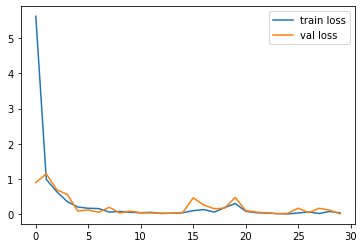

In [10]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.savefig('LossVal_loss')
plt.legend()
plt.show()


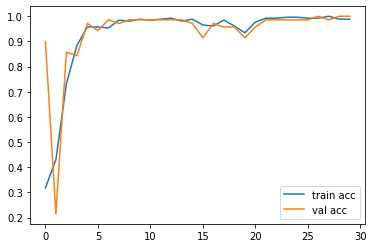

In [11]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.savefig('AccVal_acc')
plt.legend()
plt.show()


In [12]:
Classifier.save('new1.h5')

In [13]:
from keras.utils import Sequence 
test_score = Classifier.evaluate(test_set)

3/3 [==============================] - 2s 508ms/step - loss: 0.0072 - accuracy: 1.0000


In [14]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools 


target_names = []
for key in training_set.class_indices:
    target_names.append(key)

In [15]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    plt.figure(figsize=(10,10))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

3/3 [==============================] - 2s 480ms/step
Confusion Matrix
Confusion matrix, without normalization


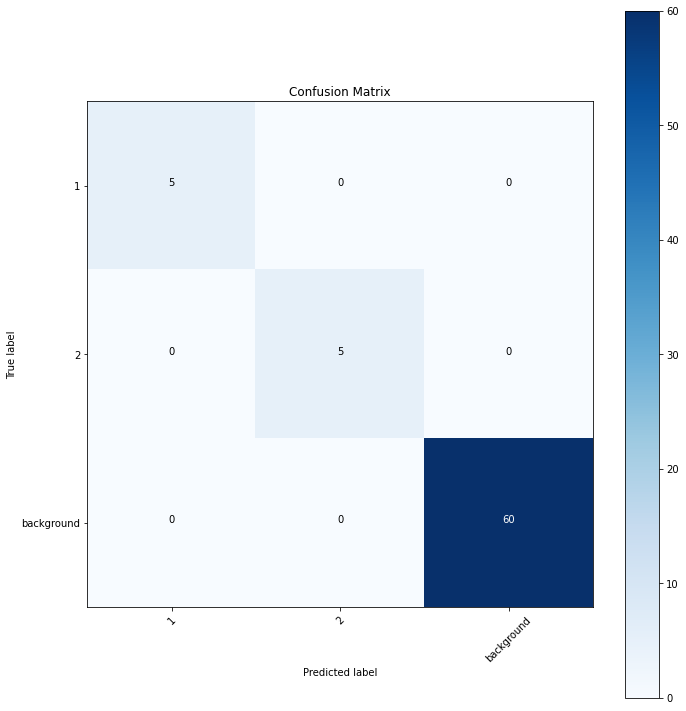

In [16]:
#Confution Matrix and Classification Report
Y_pred = Classifier.predict(test_set)
y_pred = np.argmax(Y_pred, axis=-1)
print('Confusion Matrix') 
cm=confusion_matrix(test_set.classes, y_pred)

plot_confusion_matrix(cm, target_names, title='Confusion Matrix')

In [17]:
print('Classification Report')
print(classification_report(test_set.classes, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
  background       1.00      1.00      1.00        60

    accuracy                           1.00        70
   macro avg       1.00      1.00      1.00        70
weighted avg       1.00      1.00      1.00        70



In [18]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [54]:
from tensorflow.keras.models import load_model
model=load_model('new1.h5')

In [59]:
img=image.load_img('data/train/1/13.jpg',target_size=(224,224))

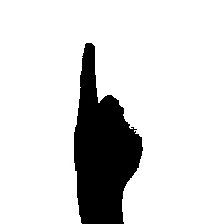

In [60]:
img

In [61]:
test_image=image.img_to_array(img)
test_image=np.expand_dims(test_image, axis = 0)

In [62]:
result = model.predict(test_image)
dict={0:"one",1:"two",2:"back"}
words = dict[np.argmax(result)]
print(words)


1/1 [==============================] - 0s 149ms/step
one
